# Home project 3 (Monte Carlo) - Ismail Olumegbon

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
def scattering():
    cost = 1.0*(2.0*np.random.random_sample()-1.0)
    sint = np.sqrt(1.0-cost*cost)
    phi = 2.0*np.pi*np.random.random_sample()
    cosp = np.cos(phi)
    sinp = np.sin(phi)
    return cost, sint, cosp, sinp, phi

In [ ]:
def outputbins(mu, mubins,n):#bin the photons uniformly from 0-90 degrees.
    dtheta=1.0/mubins
    width=0.5*dtheta
    thetan=np.zeros(mubins)
    theta=np.zeros(mubins)
    bins=np.zeros(mubins+1)
    for i in range(mubins):
        thetan[i]=np.arccos(i*dtheta+width)*(180.0/np.pi)
        theta[i]=np.flip(thetan[i])
    for i in range(int(n)):
        #if mu[i]>=0:
        j=abs(int(mu[i]*mubins))
        bins[j]=bins[j]+1

    return bins, theta

In [ ]:
if __name__ == "__main__":
    taumax = 0.3
    nphotons = 10000000
    mubins = 91
    F0 = 1
    phibins = 10
    mu0=np.linspace(0.001, 1.0, nphotons+1)
    mu1=np.array(np.zeros(nphotons))
    phi1=np.array(np.zeros(nphotons))
    i=1
    albedo = 0.45
    while i <= nphotons:
        #Launching of photons
        cost = -mu0[i]
        phi = 2.0 * np.pi * np.random.random_sample()
        #cost = mu0[i]
        #phi = np.pi + 2.0 * np.pi * np.random.random_sample()
        sint = np.sqrt(1-cost*cost)
        cosp = np.cos(phi)
        sinp = np.sin(phi)
        xt, yt, zt = 0.0,0.0,0.3

         #.Scattering begins
        while zt>=0.0 and zt<=taumax:
            x=xt
            y=yt
            z=zt
            s=-1.0*np.log(1.-np.random.random_sample())
            xt=x+s*sint*cosp
            yt=y+s*sint*sinp
            zt=z-s*cost
            if np.random.random_sample() < albedo and zt>0 and zt<taumax:
                cost,sint,cosp,sinp,phi = scattering()
        if zt>=taumax:
            mu1[i-1]=cost
            phi1[i-1]=phi
            i=i+1
    muhist,theta=outputbins(mu1,mubins,nphotons)
    reflectance = np.zeros(mubins)

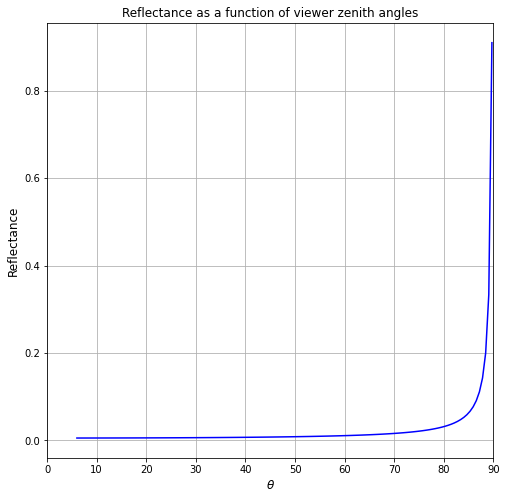

In [ ]:
reflectance = np.zeros(mubins)
for j in range(mubins):
    reflectance[j]=F0*(muhist[j])/(2*sum(muhist)*np.cos((theta[j])*np.pi/180.0))

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(theta,reflectance,'b-')
ax.set_ylabel('Reflectance',fontsize='large')
ax.set_xlabel(r'$\theta$',fontsize='large')
ax.grid(True)
ax.set_title('Reflectance as a function of viewer zenith angles',fontsize='large')
ax.set_xlim(0.0,90)
plt.show()

In [ ]:
print(theta, reflectance)

[89.68518644 89.0555213  88.42574206 87.7957725  87.16553621 86.53495648
 85.90395624 85.27245794 84.64038348 84.00765413 83.37419044 82.73991211
 82.10473796 81.46858576 80.83137219 80.19301267 79.55342132 78.91251079
 78.27019218 77.62637488 76.98096648 76.33387259 75.68499673 75.03424016
 74.38150172 73.72667769 73.06966155 72.41034385 71.74861199 71.08434997
 70.41743821 69.74775326 69.07516757 68.3995492  67.72076148 67.03866274
 66.35310592 65.66393817 64.97100051 64.2741273  63.57314581 62.86787566
 62.15812828 61.44370622 60.72440254 60.         59.27027025 58.53497293
 57.79385464 57.04664784 56.29306961 55.53282032 54.76558202 53.9910168
 53.20876487 52.41844238 51.619639   50.81191521 49.99479912 49.16778297
 48.33031907 47.48181506 46.62162861 45.74906109 44.86335033 43.96366204
 43.0490798  42.11859305 41.1710829  40.2053049  39.21986833 38.2132107
 37.18356639 36.12892747 35.04699427 33.93511223 32.79019001 31.60859164
 30.38599187 29.11717808 27.7957725  26.41383167 24.9

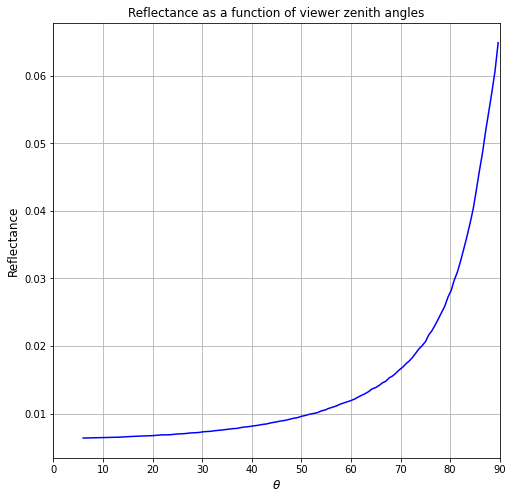

In [ ]:
reflectance = np.zeros(mubins)
for j in range(mubins):
    reflectance[j]=F0*(muhist[j])/(2*sum(muhist)*np.cos((theta[j])*np.pi/180.0))

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(theta,reflectance,'b-')
ax.set_ylabel('Reflectance',fontsize='large')
ax.set_xlabel(r'$\theta$',fontsize='large')
ax.grid(True)
ax.set_title('Reflectance as a function of viewer zenith angles',fontsize='large')
ax.set_xlim(0.0,90)
plt.show()

In [ ]:
print(theta, reflectance)

[89.68518644 89.0555213  88.42574206 87.7957725  87.16553621 86.53495648
 85.90395624 85.27245794 84.64038348 84.00765413 83.37419044 82.73991211
 82.10473796 81.46858576 80.83137219 80.19301267 79.55342132 78.91251079
 78.27019218 77.62637488 76.98096648 76.33387259 75.68499673 75.03424016
 74.38150172 73.72667769 73.06966155 72.41034385 71.74861199 71.08434997
 70.41743821 69.74775326 69.07516757 68.3995492  67.72076148 67.03866274
 66.35310592 65.66393817 64.97100051 64.2741273  63.57314581 62.86787566
 62.15812828 61.44370622 60.72440254 60.         59.27027025 58.53497293
 57.79385464 57.04664784 56.29306961 55.53282032 54.76558202 53.9910168
 53.20876487 52.41844238 51.619639   50.81191521 49.99479912 49.16778297
 48.33031907 47.48181506 46.62162861 45.74906109 44.86335033 43.96366204
 43.0490798  42.11859305 41.1710829  40.2053049  39.21986833 38.2132107
 37.18356639 36.12892747 35.04699427 33.93511223 32.79019001 31.60859164
 30.38599187 29.11717808 27.7957725  26.41383167 24.9

In [ ]:
response = pd.read_csv('RT-Code.csv')
pd.set_option('display.max_columns', None)
response

,Cos(VZA),Monte Carlo,Single Scattering
0,0.00,0.066293,0.111144
1,0.15,0.030976,0.071728
2,0.20,0.024821,0.061857
3,0.30,0.018358,0.049130
4,0.40,0.014535,0.040643
5,0.50,0.011954,0.034703
6,0.60,0.010243,0.030358
7,0.70,0.008903,0.027067
8,0.80,0.007824,0.024504
9,0.99,0.006371,0.020814


In [ ]:
residual = response['Single Scattering']-response['Monte Carlo']
residual_mean = response['Single Scattering'] - response['Monte Carlo'].mean()
mse = np.sum(np.square(residual))/len(residual)
rmse = np.sqrt(np.sum(np.square(residual))/len(residual))
mae = np.sum(np.abs(residual))/len(residual)
rsquare = 1 - (np.sum(np.square(residual))/np.sum(np.square(residual_mean)))
print(f'MSE = {mse}')
print(f'RMSE = {rmse}')
print(f'MAE = {mae}')
print(f'R2 = {rsquare}')

MSE = 0.000841143042
RMSE = 0.029002466136520185
MAE = 0.027166999999999997
R2 = 0.4154246485820041


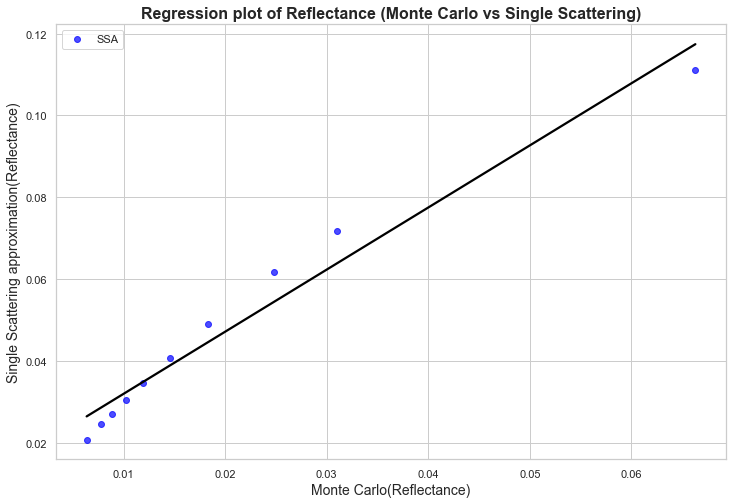

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('whitegrid')
ax = sns.regplot(x="Monte Carlo", y="Single Scattering", data=response, scatter_kws={"color": "blue", "alpha": 0.7}, line_kws={"color": "black"}, label="SSA", ci=None)

# Set the graph's title
ax.set_title("Regression plot of Reflectance (Monte Carlo vs Single Scattering)" ,fontsize= 16, weight='semibold')
ax.set_xlabel("Monte Carlo(Reflectance)" ,fontsize= 14)
ax.legend()
ax.set_ylabel("Single Scattering approximation(Reflectance)" ,fontsize= 14)

plt.show()